# Predicting future demand

The predict cycle takes as input the model generated in the [data analysis](./data-analysis.ipynb) stage. 

Using the transition rates and new entry rates as well as a starting population, the model iterates day-by-day to see how the population changes over time. 

We start off by calculating our population statistics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
from csdmpy import Config, DemandModellingDataContainer, ModelPredictor, PopulationStats, fs_datastore

config = Config()
datastore = fs_datastore("sample://v1.zip")
dc = DemandModellingDataContainer(datastore, config)
stats = PopulationStats(dc.enriched_view, config)


From this we can now run a model prediction to see how the population evolves. 
As we covered in the data analysis documentation, we need to provide a start and end date for the analysis window.

In [2]:
start_date, end_date = pd.to_datetime('2019-07-01'), pd.to_datetime('2020-01-01')
predictor = ModelPredictor.from_model(stats, start_date, end_date)

The predictor is an iterative model that has a state and can return the predictor for the next period. 

To see the current population, in this case the starting population from the model, view the `initial_population`:

In [3]:
predictor.initial_population

date                       2020-01-01
age_bin    placement_type            
Birth to 1 Foster                 0.0
           Other                  0.0
1 to 5     Foster                 0.0
           Other                  0.0
5 to 10    Foster                23.0
           Resi                   3.0
           Other                  0.0
10 to 16   Foster               130.0
           Resi                  31.0
           Other                 23.0
16 to 18+  Foster                 9.0
           Resi                   1.0
           Supported             14.0
           Other                  7.0

We can now ask for the next population:

In [4]:
predictor = predictor.next()
predictor.initial_population

age_bin     placement_type
Birth to 1  Foster              0.000000
            Other               0.000000
            Resi                0.000000
            Supported           0.000000
1 to 5      Foster              0.000000
            Other               0.000000
            Resi                0.000000
            Supported           0.000000
5 to 10     Foster             22.968340
            Other               0.004142
            Resi                3.000521
            Supported           0.000000
10 to 16    Foster            129.721683
            Other              22.999167
            Resi               30.986874
            Supported           0.000000
16 to 18+   Foster              9.044089
            Other               6.995609
            Resi                1.008479
            Supported          13.954944
Name: 2020-01-02 00:00:00, dtype: float64

You can run the above block multiple times to see the population change. To reset, go back and create a new predictor from the initial state. 

Since we usually want to run multiple iterations in one simple operations, there is also a utility method on the predictor to run *n* generations and return a dataframe of all the populations. You can add progress=True to get a progress bar so you have something to enjoy watching while you make a cup of tea...

In [5]:
predictor = ModelPredictor.from_model(stats, start_date, end_date)
predicted_pop = predictor.predict(720, progress=True)  # Predict 720 days forward
predicted_pop

2021-12: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 720/720 [00:12<00:00, 57.95it/s]


age_bin        Birth to 1                      1 to 5                       \
placement_type     Foster Other Resi Supported Foster Other Resi Supported   
2020-01-02            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2020-01-03            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2020-01-04            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2020-01-05            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2020-01-06            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
...                   ...   ...  ...       ...    ...   ...  ...       ...   
2021-12-17            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2021-12-18            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2021-12-19            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2021-12-20            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   
2021-12-21            0.0   0.0  0.0       0.0    0.0   0.0  0.0       0.0   

age_bin           5 to 10                                  10 to 16  \
placement_type     Foster     Other      Resi Supported      Foster   
2020-01-02      22.968340  0.004142  3.000521       0.0  129.721682   
2020-01-03      22.936731  0.008276  3.001033       0.0  129.444072   
2020-01-04      22.905173  0.012402  3.001534       0.0  129.167167   
2020-01-05      22.873666  0.016520  3.002027       0.0  128.890966   
2020-01-06      22.842210  0.020630  3.002510       0.0  128.615467   
...                   ...       ...       ...       ...         ...   
2021-12-17       9.550023  1.556470  2.209523       0.0   35.818642   
2021-12-18       9.540056  1.557337  2.207909       0.0   35.767403   
2021-12-19       9.530104  1.558202  2.206296       0.0   35.716276   
2021-12-20       9.520169  1.559064  2.204683       0.0   35.665259   
2021-12-21       9.510249  1.559924  2.203071       0.0   35.614354   

age_bin                                         16 to 18+                      \
placement_type      Other       Resi Supported     Foster     Other      Resi   
2020-01-02      22.999167  30.985234       0.0   9.044089  6.995609  1.008479   
2020-01-03      22.998229  30.972037       0.0   9.087937  6.991213  1.016903   
2020-01-04      22.997185  30.958765       0.0   9.131543  6.986814  1.025275   
2020-01-05      22.996036  30.945420       0.0   9.174909  6.982410  1.033593   
2020-01-06      22.994783  30.932000       0.0   9.218036  6.978003  1.041859   
...                   ...        ...       ...        ...       ...       ...   
2021-12-17      12.995634  16.222949       0.0  12.132586  3.850464  1.578978   
2021-12-18      12.981123  16.204584       0.0  12.122960  3.846705  1.577503   
2021-12-19      12.966625  16.186236       0.0  12.113330  3.842949  1.576028   
2021-12-20      12.952141  16.167905       0.0  12.103697  3.839195  1.574554   
2021-12-21      12.937669  16.149592       0.0  12.094061  3.835443  1.573079   

age_bin                    
placement_type  Supported  
2020-01-02      13.954944  
2020-01-03      13.910097  
2020-01-04      13.865458  
2020-01-05      13.821024  
2020-01-06      13.776796  
...                   ...  
2021-12-17       3.536456  
2021-12-18       3.532263  
2021-12-19       3.528078  
2021-12-20       3.523900  
2021-12-21       3.519729  

[720 rows x 20 columns]

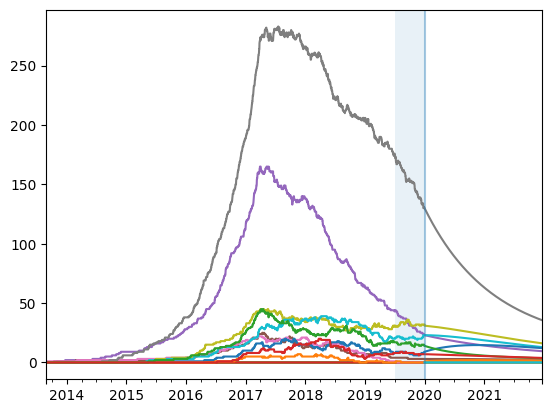

In [8]:
historic_pop = stats.stock.loc[:end_date]
combined_pop = pd.concat([historic_pop, predicted_pop], axis=0)

combined_pop.plot(legend=False)
pp.axvline(end_date, alpha=0.4)
pp.axvspan(start_date, end_date, alpha=0.1)
pp.show()

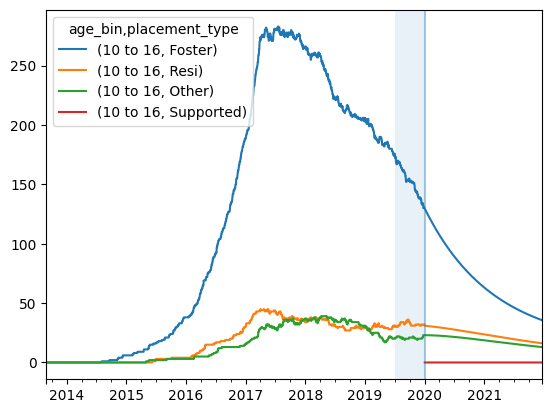

In [15]:
combined_pop[[config.AgeBrackets.TEN_TO_SIXTEEN]].plot()
pp.axvline(end_date, alpha=0.4)
pp.axvspan(start_date, end_date, alpha=0.1)
pp.show()

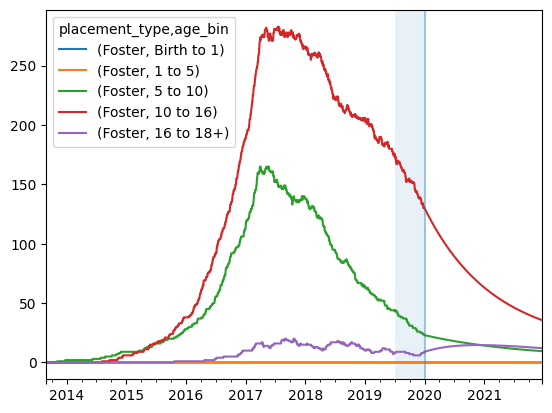

In [24]:
combined_pop.swaplevel(axis=1)[[config.PlacementCategories.FOSTERING]].plot()
pp.axvline(end_date, alpha=0.4)
pp.axvspan(start_date, end_date, alpha=0.1)
pp.show()